# Unsupervised Learning Project

Steps to follow:

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the    
   clusters (15 points)
4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('cars.csv')
data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


# 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [3]:
data.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

In [4]:
print(data.head())
print(data.index)
print(data.columns)

                    car name  cyl   disp   hp    wt   acc  yr   mpg
0  chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0
1          buick skylark 320    8  350.0  165  3693  11.5  70  15.0
2         plymouth satellite    8  318.0  150  3436  11.0  70  18.0
3              amc rebel sst    8  304.0  150  3433  12.0  70  16.0
4                ford torino    8  302.0  140  3449  10.5  70  17.0
RangeIndex(start=0, stop=398, step=1)
Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')


In [5]:
data.shape

(398, 8)

In [6]:
data.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [7]:
data.columns.tolist()

['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']

In [8]:
#data =["cyl","disp","wt","acc","yr","mpg","hp"]
#ata

In [9]:
data.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

# Checking any missing values

In [10]:
data.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

# unique elements of horsepower to look for discrepancies 

In [11]:
data.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
data.hp.value_counts()
print("We have", (data.hp == "?").sum(), "?'s that need to be replaced!")

We have 6 ?'s that need to be replaced!


In [13]:
data = data[data.hp != '?']

In [14]:
data.hp.value_counts()
print("We have", (data.hp == "?").sum(), "?'s that need to be replaced!")

We have 0 ?'s that need to be replaced!


In [15]:
print('?' in data.hp)

False


In [16]:
data.hp.value_counts()
print("We have", (data.hp == "?").sum(), "?'s that need to be replaced!")

We have 0 ?'s that need to be replaced!


In [17]:
# We will replace ? with '0' so that we can convert the column to a integer using astype()
data.hp.replace('?', '0', inplace=True)
data.hp = data.hp.astype(dtype=int)

In [18]:
data.hp.value_counts()

150    22
90     20
88     19
110    18
100    17
95     14
75     14
105    12
67     12
70     12
65     10
85      9
97      9
80      7
145     7
140     7
72      6
68      6
78      6
92      6
84      6
60      5
170     5
175     5
180     5
115     5
71      5
86      5
130     5
76      4
       ..
66      1
230     1
82      1
89      1
220     1
210     1
208     1
200     1
193     1
167     1
158     1
152     1
149     1
148     1
142     1
138     1
137     1
135     1
133     1
132     1
122     1
116     1
113     1
108     1
107     1
103     1
94      1
93      1
91      1
102     1
Name: hp, Length: 93, dtype: int64

In [19]:
data.shape

(392, 8)

In [20]:
data.dtypes

car name     object
cyl           int64
disp        float64
hp            int32
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [21]:
#Now we will double check cars.hp to make sure are our variables are of the desired type.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null int32
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 36.0+ KB


Here hp (Horsepower datatype is given as object, so convertig it into float for better analysis)

In [22]:
data.hp = data.hp.astype('float')
data.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [23]:
data.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [24]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


In [25]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

So the minimum value is 9 and maximum is 46, but on average it is 23.44 with a variation of 7.8

# 2.  Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

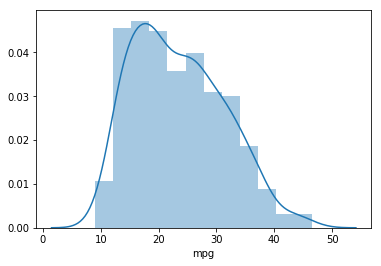

In [26]:
sns.distplot(data['mpg'])

In [27]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


Using our seaborn tool we can look at mpg:

Slight of 0,.45
Kurtosis of -0.51

Lets visualise some relationships between these data points, but before we do, we need to scale them to same the same range of [0,1]¶
In order to do so, lets define a function scale




In [28]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [29]:
data_scale = data.copy()

In [30]:
data_scale ['disp'] = scale(data_scale['disp'])
data_scale['hp'] = scale(data_scale['hp'])
data_scale ['acc'] = scale(data_scale['acc'])
data_scale ['wt'] = scale(data_scale['wt'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [31]:
data_scale.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,0.617571,0.456522,0.536150,0.238095,70,0.239362
1,buick skylark 320,8,0.728682,0.646739,0.589736,0.208333,70,0.159574
2,plymouth satellite,8,0.645995,0.565217,0.516870,0.178571,70,0.239362
3,amc rebel sst,8,0.609819,0.565217,0.516019,0.238095,70,0.186170
4,ford torino,8,0.604651,0.510870,0.520556,0.148810,70,0.212766


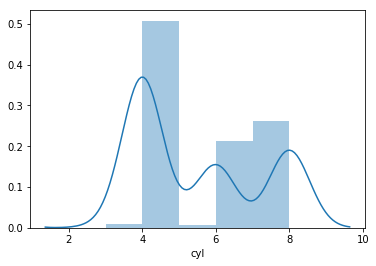

In [32]:
sns.distplot(data['cyl'])

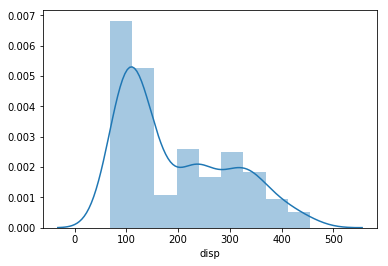

In [33]:
sns.distplot(data['disp'])

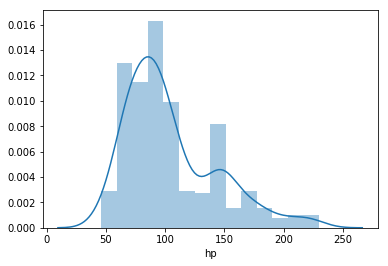

In [34]:
sns.distplot(data['hp'])

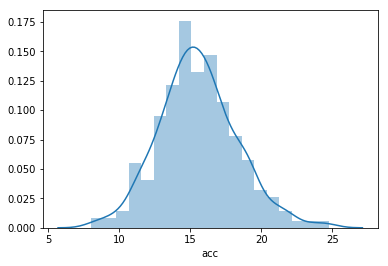

In [35]:
sns.distplot(data['acc'])

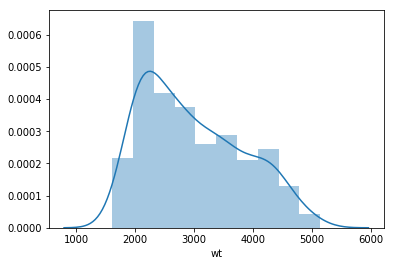

In [36]:
sns.distplot(data['wt'])

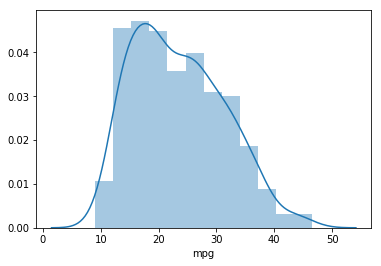

In [37]:
sns.distplot(data['mpg'])

All our data is now scaled to the same range of [0,1]. This will help us visualize data better. We used a copy of the original data-set for this as we will use the data-set later when we build regression models.

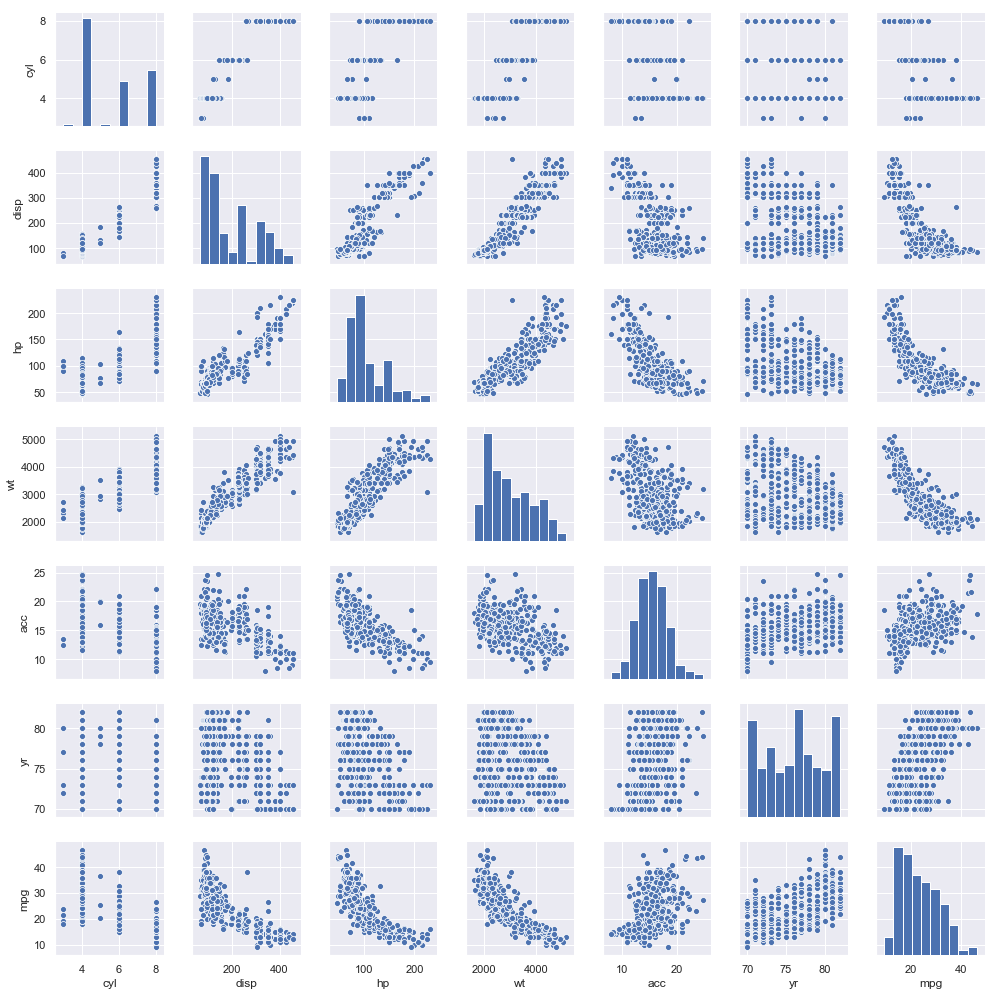

In [38]:
#scatterplot
sns.set()
sns.pairplot(data, size = 2.0)
plt.show()

In [41]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            388, 389, 390, 391, 392, 393, 394, 395, 396, 397],
           dtype='int64', length=392)

# 3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [42]:
data1=data.drop("car name",axis=1)
data1.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


In [43]:
data1.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


# Group Data into similar clusters 

# K means Clustering 

In [123]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [124]:
km.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [125]:
#calculating Centroids
centroid = kmeans.cluster_centers_
print(centroid.shape)
print(centroid)

(3, 7)
[[5.81967213e+00 2.12614754e+02 1.05401639e+02 3.16258197e+03
  1.59040984e+01 7.63524590e+01 2.07893443e+01]
 [4.03888889e+00 1.07208333e+02 7.71666667e+01 2.22282778e+03
  1.63344444e+01 7.67111111e+01 2.96516667e+01]
 [7.86666667e+00 3.44144444e+02 1.57811111e+02 4.23632222e+03
  1.34633333e+01 7.40111111e+01 1.46355556e+01]]


# Method-1 for Elbow Diagram

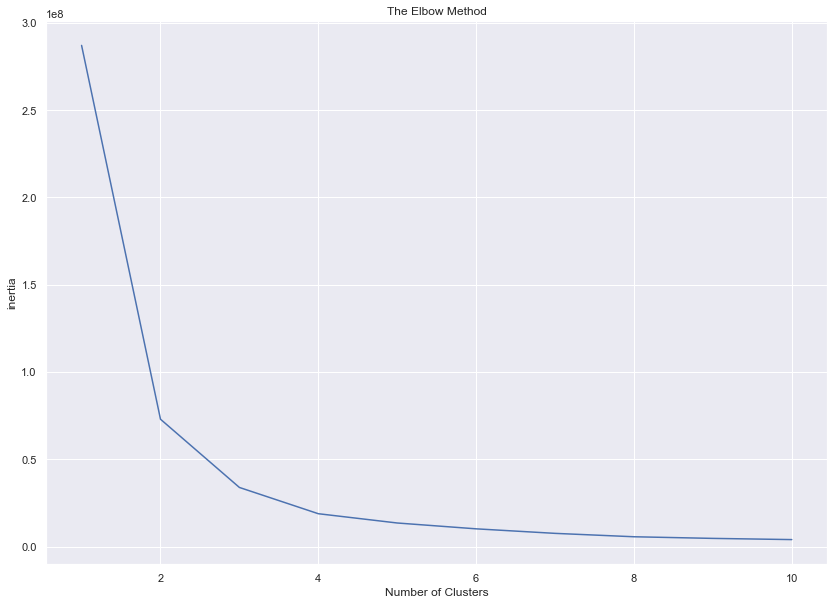

In [50]:

from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter =300, n_init=10, random_state=0)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

# Method-2 for Elbow Diagram

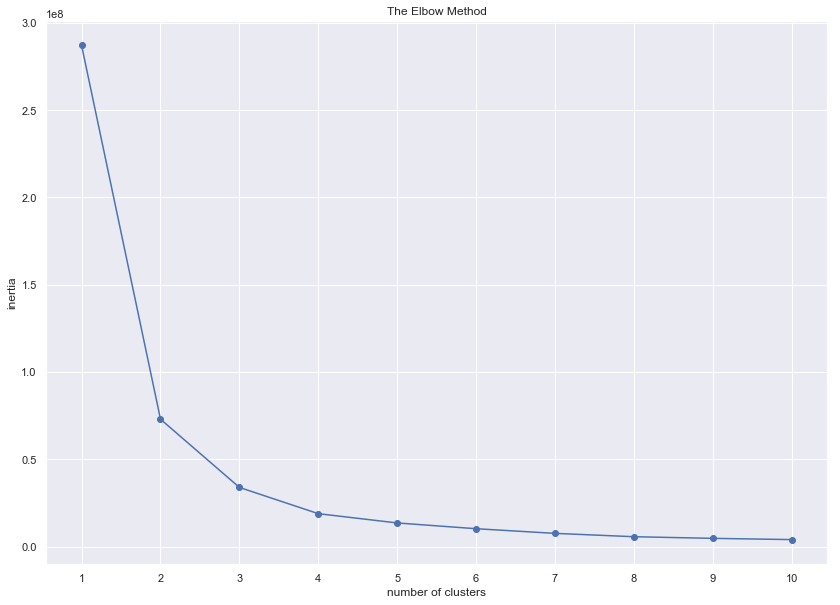

In [51]:


ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters= k)
    
    # Fit model to samples
    kmeans.fit(data1)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [52]:
data1['clustersLabels']=km.predict(data1)

In [53]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000C125A64EF0>,
      dtype=object)

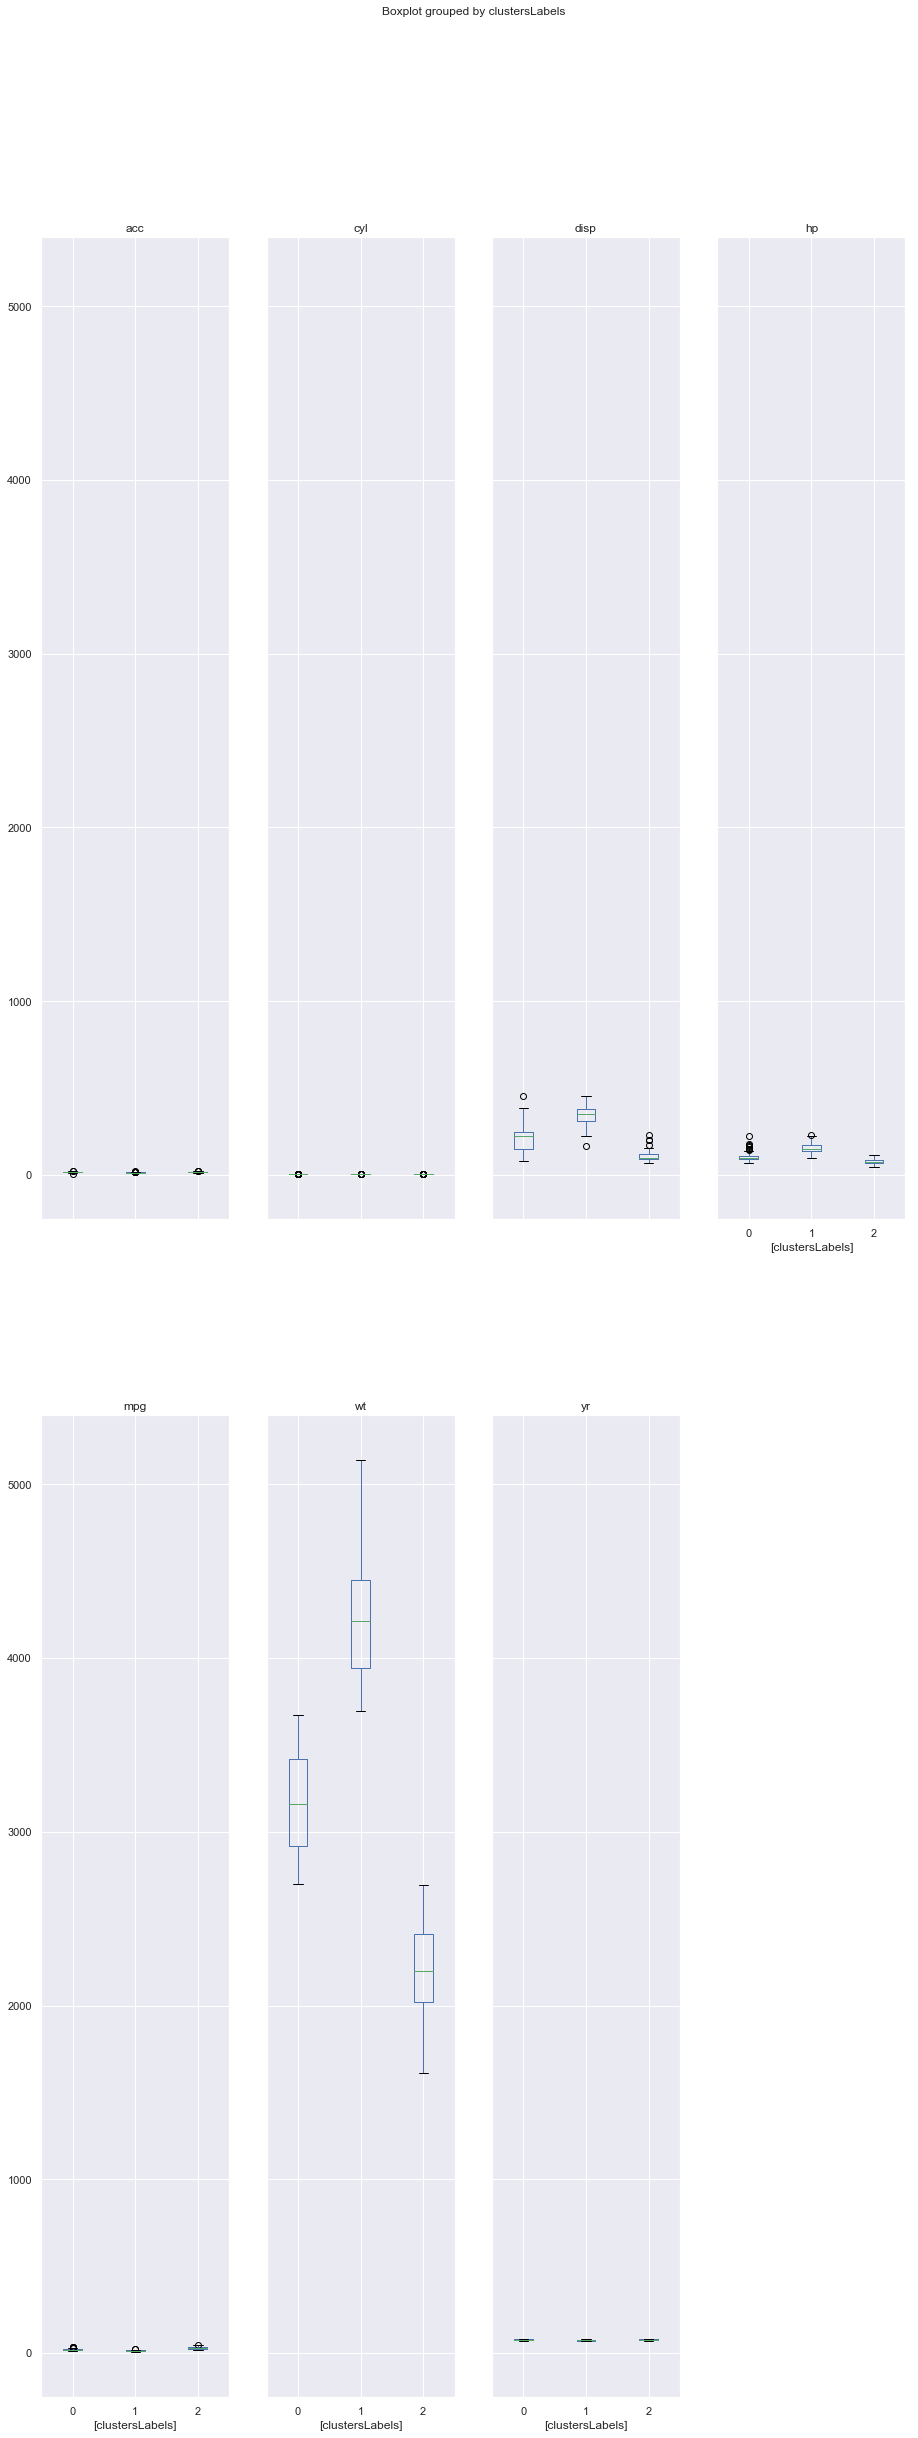

In [58]:
data1.boxplot(by='clustersLabels',layout=(2,4),figsize=(15,40))

# Calculate distortions for 1 to 10 clusters

In [59]:
#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(1,10):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i)
    
    #Fit on the data
    km.fit(data1)
    
    #Add cluster information for each record in dataframe
    data1['k_'+str(i)] = km.predict(data1)
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

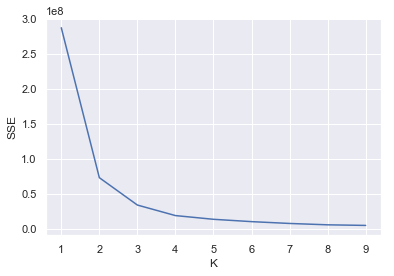

In [60]:
sns.lineplot(x='K',y='SSE',data=sse_df)

Visualize clusters with K=3

In [61]:
plt.rcParams['figure.figsize'] = (16, 9)

plt.style.use('ggplot')

from sklearn import metrics

Input Data and Shape
(398, 8)


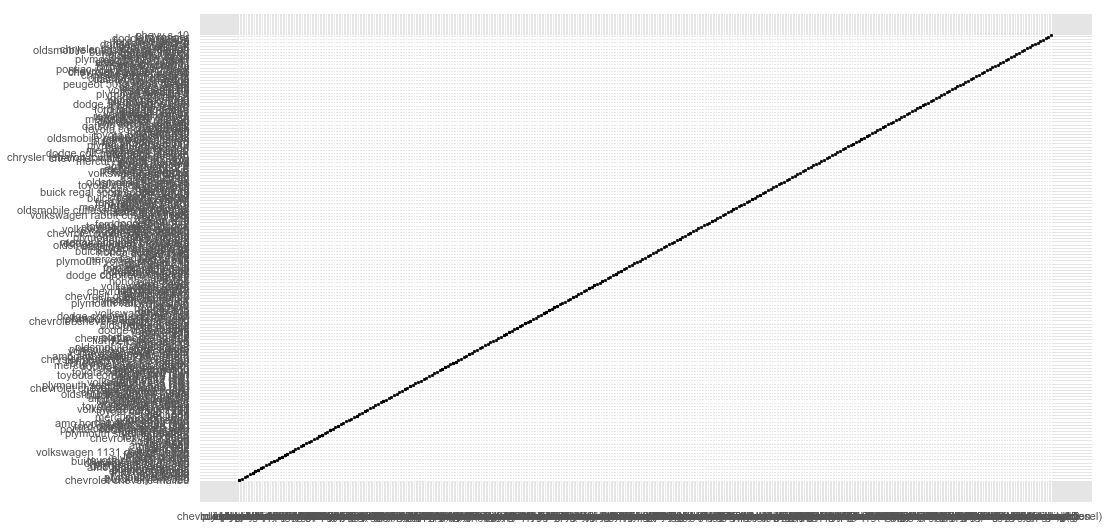

In [62]:
data = pd.read_csv('cars.csv')

print("Input Data and Shape")

print(data.shape)

data.head()



# Getting the values and plotting it

f1 = data['car name'].values

f2 = data['car name'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)

In [63]:
from sklearn.decomposition import PCA


kmeans = KMeans(n_clusters=3)
# This is to predict the clusters belongs to which observation. It will return as single vector. All the cluster values to be stored in new column 

data1["kmeans"] = kmeans.fit_predict(data1[data1.columns[:7]])

In [64]:
# Princople Component Separation for 2-Dimensional picture (PCA)
cols = data1.columns[1:]
pca = PCA(n_components=2)
data1['x'] = pca.fit_transform(data1[cols])[:,0]
data1['y'] = pca.fit_transform(data1[cols])[:,1]
data1 = data1.reset_index()
data1.tail()

,index,cyl,disp,hp,wt,acc,yr,mpg,clustersLabels,k_1,...,k_3,k_4,k_5,k_6,k_7,k_8,k_9,kmeans,x,y
387,393,4,140.0,86.0,2790,15.6,82,27.0,0,0,...,0,0,0,5,1,1,3,0,-193.180650,-34.536097
388,394,4,97.0,52.0,2130,24.6,82,44.0,2,0,...,2,2,2,3,4,2,1,1,-854.711370,-6.166440
389,395,4,135.0,84.0,2295,11.6,82,32.0,2,0,...,2,2,2,3,4,2,1,1,-685.224341,20.037249
390,396,4,120.0,79.0,2625,18.6,82,28.0,2,0,...,2,0,0,0,1,5,3,1,-359.541389,-35.702501
391,397,4,119.0,82.0,2720,19.4,82,31.0,0,0,...,0,0,0,0,1,5,3,0,-265.259458,-47.320419


# Visualizing the Cluster

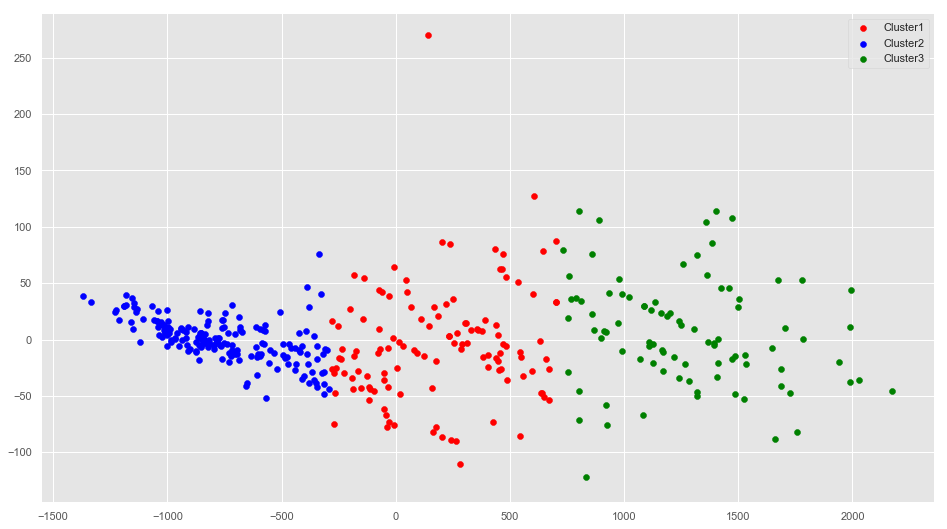

In [65]:

trace0 = plt.scatter(x = data1[data1.kmeans ==0]["x"],y = data1[data1.kmeans ==0]["y"],  label="Cluster1", color = 'red')
trace1 = plt.scatter(x = data1[data1.kmeans ==1]["x"],y = data1[data1.kmeans ==1]["y"],   label="Cluster2", color = 'blue')
trace2 = plt.scatter(x = data1[data1.kmeans ==2]["x"],y = data1[data1.kmeans ==2]["y"],   label="Cluster3", color = 'green')

datan = [trace0,trace1,trace2]
plt.legend()
plt.show(datan)

# Visualizing the Cluster with centroid

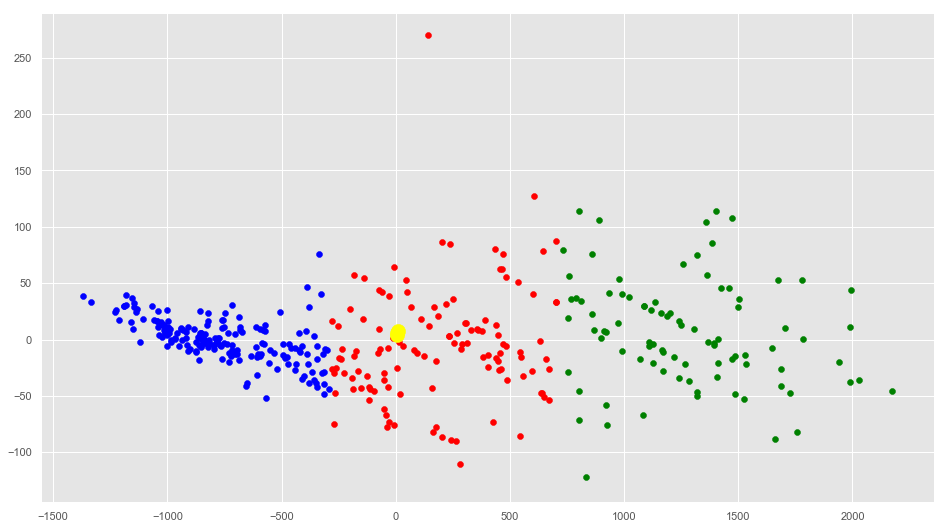

In [66]:

trace0 = plt.scatter(x = data1[data1.kmeans ==0]["x"],y = data1[data1.kmeans ==0]["y"],  label="Cluster1", color = 'red')
trace1 = plt.scatter(x = data1[data1.kmeans ==1]["x"],y = data1[data1.kmeans ==1]["y"],   label="Cluster2", color = 'blue')
trace2 = plt.scatter(x = data1[data1.kmeans ==2]["x"],y = data1[data1.kmeans ==2]["y"],   label="Cluster3", color = 'green')
centroid = plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0],  s=200, label="Centroid", color = 'yellow')

In [69]:
#calculating Centroids
centroid = kmeans.cluster_centers_
print(centroid.shape)
print(centroid)

(3, 7)
[[5.81967213e+00 2.12614754e+02 1.05401639e+02 3.16258197e+03
  1.59040984e+01 7.63524590e+01 2.07893443e+01]
 [4.03888889e+00 1.07208333e+02 7.71666667e+01 2.22282778e+03
  1.63344444e+01 7.67111111e+01 2.96516667e+01]
 [7.86666667e+00 3.44144444e+02 1.57811111e+02 4.23632222e+03
  1.34633333e+01 7.40111111e+01 1.46355556e+01]]


# 4. Use linear regression model on different clusters separately and print the coefficients of the models individual

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
# Storing the each cluster data in the dataset
data1["cluster1"] = data1.kmeans==0
data1["cluster2"] = data1.kmeans==1
data1["cluster3"] = data1.kmeans==2
data1.head()

,index,cyl,disp,hp,wt,acc,yr,mpg,clustersLabels,k_1,...,k_6,k_7,k_8,k_9,kmeans,x,y,cluster1,cluster2,cluster3
0,0,8,307.0,130.0,3504,12.0,70,18.0,0,0,...,2,2,4,2,0,536.467423,50.841064,True,False,False
1,1,8,350.0,165.0,3693,11.5,70,15.0,1,0,...,2,0,3,8,2,730.383455,79.156435,False,False,True
2,2,8,318.0,150.0,3436,11.0,70,18.0,0,0,...,2,2,4,2,0,471.005918,75.461463,True,False,False
3,3,8,304.0,150.0,3433,12.0,70,16.0,0,0,...,2,2,4,2,0,466.441085,62.585676,True,False,False
4,4,8,302.0,140.0,3449,10.5,70,17.0,0,0,...,2,2,4,2,0,481.699510,55.812429,True,False,False


# Creating dataset with each cluster separately.

In [72]:


XC1 = data1.drop(["kmeans", "x","y","cluster2","cluster3","index","clustersLabels","k_1","k_2","k_3","k_4","k_5","k_6","k_7","k_8","k_9"], axis=1)
XC2 = data1.drop(["kmeans", "x","y","cluster1","cluster3","index","clustersLabels","k_1","k_2","k_3","k_4","k_5","k_6","k_7","k_8","k_9"], axis=1)
XC3 = data1.drop(["kmeans", "x","y","cluster1","cluster2","index","clustersLabels","k_1","k_2","k_3","k_4","k_5","k_6","k_7","k_8","k_9"], axis=1)

Check the columns of each dataset with all three Clusters

In [73]:

XC1.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'cluster1'], dtype='object')

In [74]:
XC2.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'cluster2'], dtype='object')

In [75]:
XC3.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg', 'cluster3'], dtype='object')

This is to store the data points that belongs to cluster1 - True

In [76]:

Cluster1True =  XC1[XC1.cluster1==True]

# Drop the Cluster1 column 
Cluster1True = Cluster1True.drop(["cluster1"], axis=1)

Cluster1True.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0
10,8,383.0,170.0,3563,10.0,70,15.0


In [77]:
Cluster1True.shape

(122, 7)

This is to store the data points that belongs to cluster2 - True

In [78]:

Cluster2True =  XC2[XC2.cluster2==True]

# Drop the Cluster3 column 
Cluster2True = Cluster2True.drop(["cluster2"], axis=1)
Cluster2True.head()

,cyl,disp,hp,wt,acc,yr,mpg
14,4,113.0,95.0,2372,15.0,70,24.0
17,6,200.0,85.0,2587,16.0,70,21.0
18,4,97.0,88.0,2130,14.5,70,27.0
19,4,97.0,46.0,1835,20.5,70,26.0
20,4,110.0,87.0,2672,17.5,70,25.0


In [79]:
Cluster2True.shape

(180, 7)

This is to store the data points that belongs to cluster2 - True

In [80]:

Cluster3True =  XC3[XC3.cluster3==True]

# Drop the Cluster3 column 
Cluster3True = Cluster3True.drop(["cluster3"], axis=1)
Cluster3True.head()

,cyl,disp,hp,wt,acc,yr,mpg
1,8,350.0,165.0,3693,11.5,70,15.0
5,8,429.0,198.0,4341,10.0,70,15.0
6,8,454.0,220.0,4354,9.0,70,14.0
7,8,440.0,215.0,4312,8.5,70,14.0
8,8,455.0,225.0,4425,10.0,70,14.0


In [81]:
Cluster3True.shape

(90, 7)

In [82]:
#Cluster1True + Cluster2True + Cluster3True = 392 rows. Hense the distribution of datapoints is accurate

Splitting the data for each cluster1 into dependent and independent variables

In [83]:

XCluster1True = Cluster1True.drop(["mpg"], axis=1)
y1 = Cluster1True["mpg"]

In [84]:
XCluster1True.shape

(122, 6)

In [85]:
y1.shape

(122,)

Splitting the data for each cluster2 into dependent and independent variables

In [86]:


XCluster2True = Cluster2True.drop(["mpg"], axis=1)
y2 = Cluster2True["mpg"]

In [87]:
y2.shape

(180,)

In [88]:
XCluster2True.shape

(180, 6)

Splitting the data for each cluster3 into dependent and independent variables

In [89]:


XCluster3True = Cluster3True.drop(["mpg"], axis=1)
y3 = Cluster3True["mpg"]

In [90]:
XCluster3True.shape

(90, 6)

In [91]:
y3.shape

(90,)

Import the library and split the data for train and test for all three clusters 

In [92]:



from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(Cluster1True,y1,test_size=0.3)
X2_train,X2_test,y2_train,y2_test = train_test_split(Cluster2True,y2,test_size=0.3)
X3_train,X3_test,y3_train,y3_test = train_test_split(Cluster3True,y3,test_size=0.3)



# print("Training Dataset Count: " + str(X1_train.count()))
# print("Test Dataset Count: " + str(X1_test.count()))

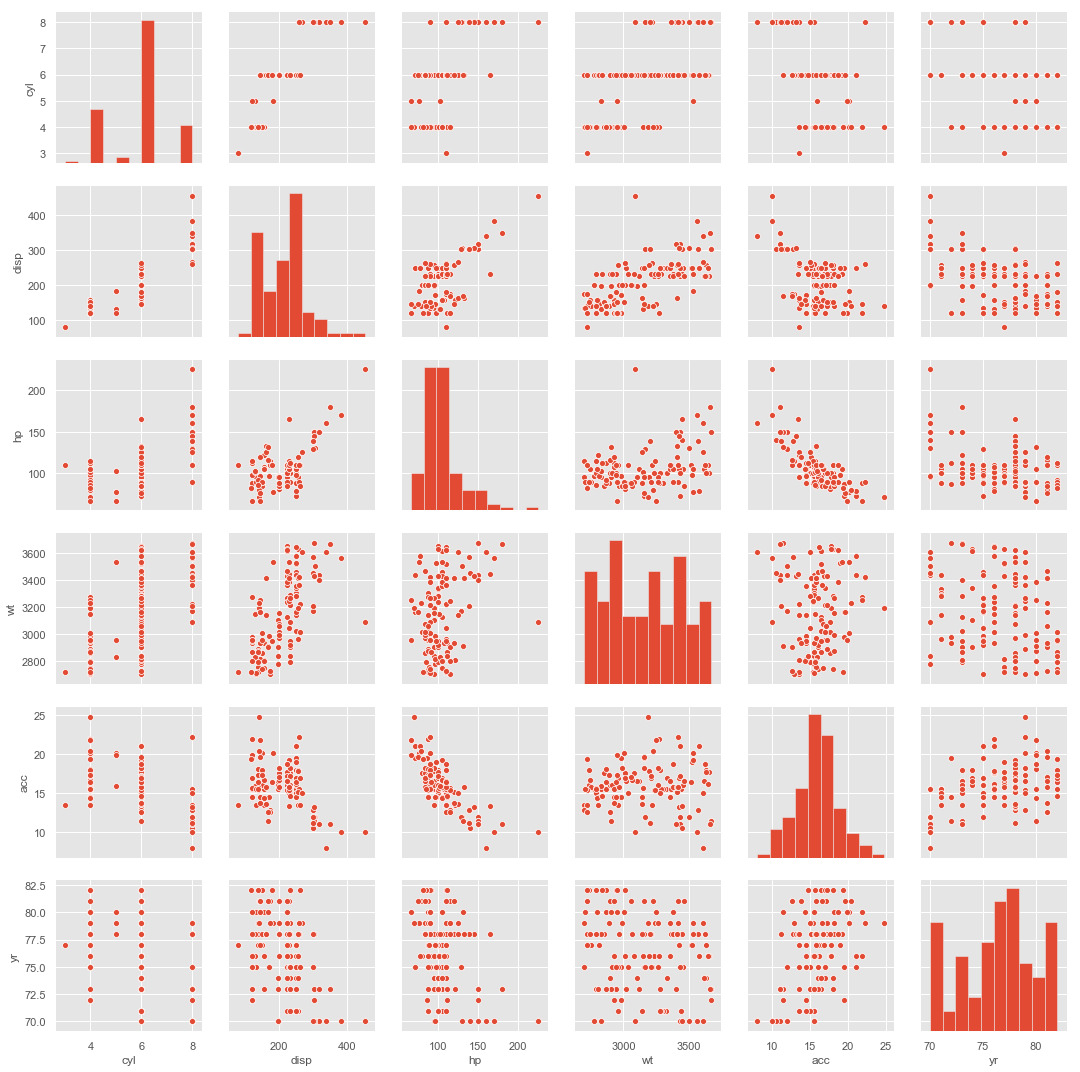

In [93]:
sns.pairplot(XCluster1True)

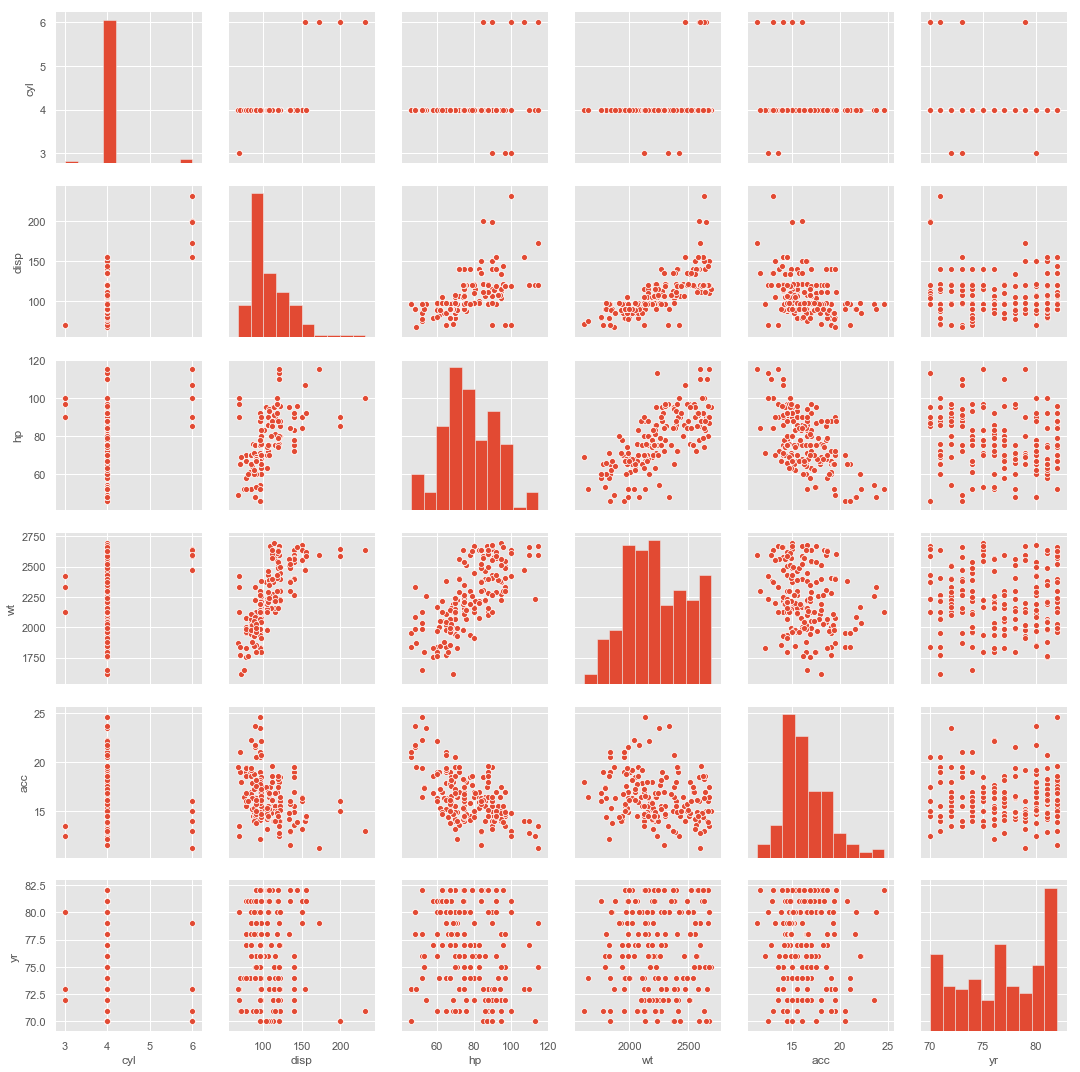

In [94]:
sns.pairplot(XCluster2True)

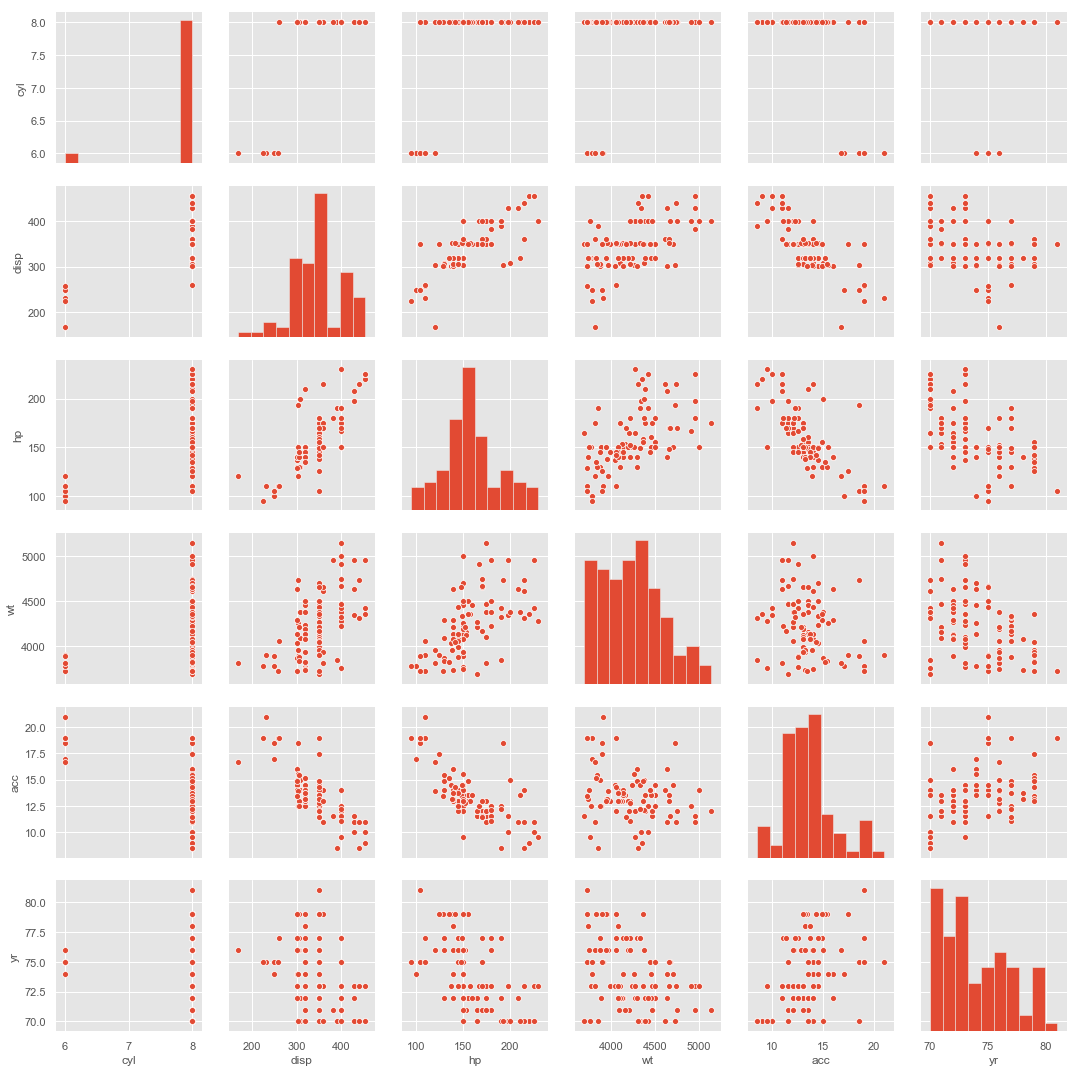

In [126]:
sns.pairplot(XCluster3True)

# Linear Regression for Cluster1

In [95]:
from sklearn.linear_model import LinearRegression

Train the model

In [96]:

regressor1 = LinearRegression()

regressor1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
y1_predicted = regressor1.predict(X1_test)
y1_predicted

array([19. , 17. , 22.4, 22. , 18. , 20.6, 22.5, 18. , 20.2, 19. , 19. ,
       20.5, 18. , 21.6, 26.4, 20.6, 18. , 13. , 22.3, 21.5, 25.4, 23. ,
       18. , 29.8, 27. , 38. , 24. , 24.3, 19.2, 22. , 26.8, 17.5, 17. ,
       19. , 19. , 27. , 15. ])

Root Mean Square

In [98]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_true=y1_test,y_pred=y1_predicted))
rmse

7.393641097275112e-15

Finding the coefficient 

In [99]:

coef1 = regressor1.coef_
coef1

array([-4.85201135e-16, -4.63814497e-17,  1.97030438e-16,  2.51875965e-17,
        8.69535969e-16, -1.70977959e-16,  1.00000000e+00])

Finding the intercept 

In [100]:

intr1 = regressor1.intercept_ 
intr1

-8.881784197001252e-14

Score for Train

In [101]:

regressor1.score(X1_train, y1_train)

1.0

Score for Test

In [102]:

regressor1.score(X1_test, y1_test)

1.0

 Building the formula for Multiple Linear Regression (y = mx + c)

In [103]:

y1plot = coef1 * X1_train + intr1
y1plot.head()

,cyl,disp,hp,wt,acc,yr,mpg
270,-9.075865e-14,-9.582144e-14,-7.207025e-14,-1.690725e-14,-7.351401e-14,-1.021541e-13,23.8
190,-9.172905e-14,-1.004132e-13,-6.812965e-14,-4.363831e-15,-7.620957e-14,-1.018122e-13,22.0
249,-9.269945e-14,-1.028250e-13,-6.143061e-14,1.101878e-15,-7.768778e-14,-1.021541e-13,20.2
253,-9.075865e-14,-9.531124e-14,-7.147916e-14,-2.030758e-14,-7.542699e-14,-1.021541e-13,25.1
98,-9.172905e-14,-9.957834e-14,-6.911480e-14,-1.464037e-14,-7.490527e-14,-1.012992e-13,18.0


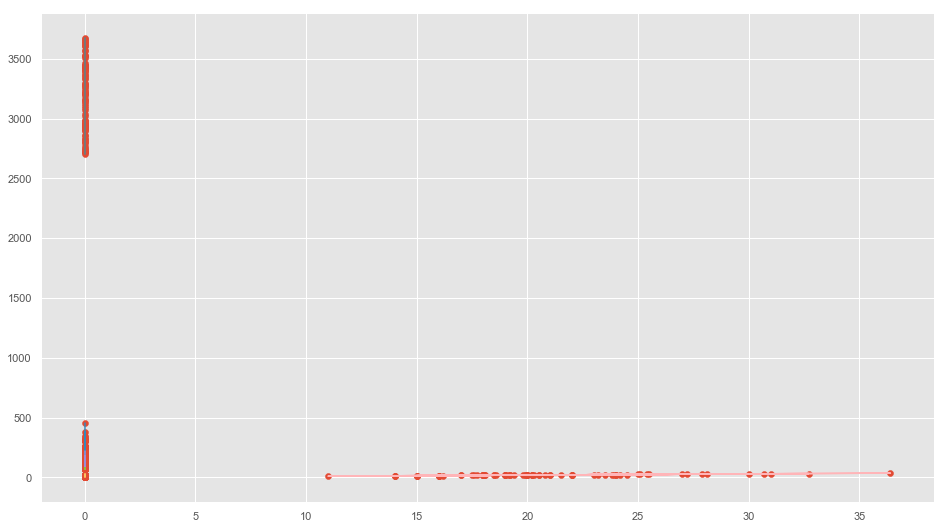

In [104]:

plt.plot(y1plot,X1_train,)
plt.scatter(y1plot,X1_train)

# Linear Regression for Cluster2

Train the model

In [105]:

regressor2 = LinearRegression()

regressor2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [106]:
y2_predicted = regressor2.predict(X2_test)
y2_predicted

array([37. , 29. , 26. , 23. , 39. , 31.3, 21. , 26. , 34. , 31. , 32.2,
       31. , 44.3, 37. , 29. , 26. , 36. , 24. , 32.4, 32.8, 22. , 23. ,
       41.5, 23. , 46.6, 24. , 37.2, 27. , 36. , 25. , 26. , 29.9, 25. ,
       21. , 26. , 30. , 24. , 24.5, 29.8, 34.7, 27. , 32. , 36.1, 23. ,
       43.1, 26. , 31.5, 30. , 26. , 32.9, 29.5, 33. , 29. , 34.4])

Root Mean Square

In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_true=y2_test,y_pred=y2_predicted))
rmse

8.539660890638339e-15

Finding the coefficient 

In [108]:
coef2 = regressor2.coef_
coef2

array([-7.04177028e-16, -5.48793420e-16, -5.06905294e-16,  3.97542960e-17,
       -7.63063380e-16, -4.18637628e-17,  1.00000000e+00])

Finding the intercept

In [109]:

intr2 = regressor2.intercept_ 
intr2

4.973799150320701e-14

Score for Train

In [110]:
regressor2.score(X2_train, y2_train)

1.0

Score for Test

In [111]:
regressor2.score(X2_test, y2_test)

1.0

Building the formula for Multiple Linear Regression (y = mx + c)

In [112]:

y2plot = coef2 * X2_train + intr2
y2plot.head()

,cyl,disp,hp,wt,acc,yr,mpg
142,4.692128e-14,8.029692e-15,2.337892e-14,1.152928e-13,3.714745e-14,4.664007e-14,31.0
193,4.692128e-14,3.090551e-15,2.337892e-14,1.306380e-13,3.279798e-14,4.655635e-14,29.0
143,4.692128e-14,4.188138e-15,1.881677e-14,1.293658e-13,3.523979e-14,4.664007e-14,32.0
70,4.762546e-14,1.132245e-14,5.681780e-16,1.423655e-13,3.943664e-14,4.672380e-14,19.0
268,4.692128e-14,-2.380033e-14,1.581989e-15,1.497200e-13,3.844465e-14,4.647262e-14,21.1


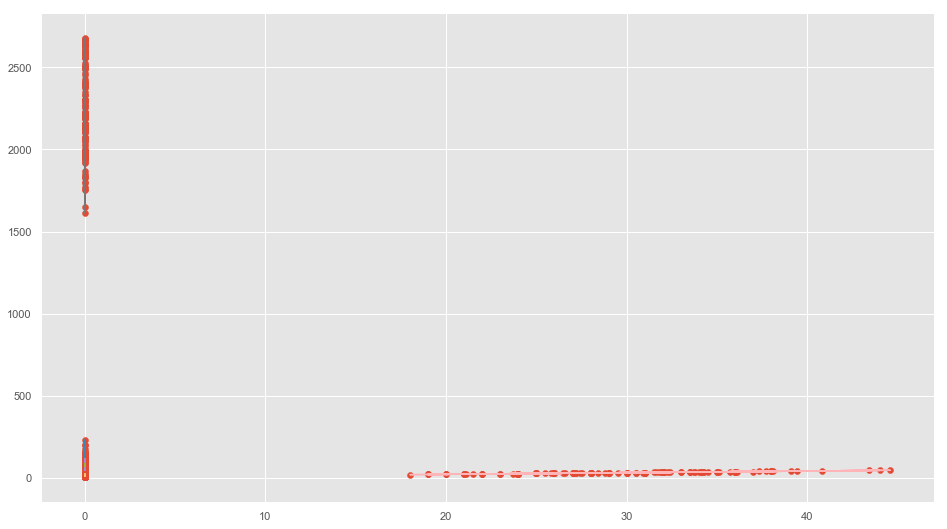

In [113]:

plt.plot(y2plot,X2_train,)
plt.scatter(y2plot,X2_train)

# Linear Regression for Cluster3

In [114]:
regressor3 = LinearRegression()

regressor3.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
y3_predicted = regressor3.predict(X3_test)
y3_predicted

array([15.5, 14. , 14. , 13. , 13. , 16. , 23. , 14. , 15. , 16. , 12. ,
       13. , 16. , 17. , 16.5, 16. , 13. , 15. , 13. , 15.5, 11. , 13. ,
       14. , 19.4, 13. , 14. , 11. ])

Root Mean Square

In [116]:

rmse = sqrt(mean_squared_error(y_true=y3_test,y_pred=y3_predicted))
rmse

5.000981143991892e-15

Find the coefficient 

In [117]:

coef3 = regressor3.coef_
coef3

array([ 3.53769408e-16,  1.25485917e-16, -2.14961175e-16, -2.18112501e-18,
        6.45114746e-16,  2.88374595e-17,  1.00000000e+00])

Find the intercept 

In [118]:

intr3 = regressor3.intercept_ 
intr3

-1.4210854715202004e-14

Score for Train

In [119]:

regressor3.score(X3_train, y3_train)

1.0

Score for Test

In [120]:

regressor3.score(X3_test, y3_test)

1.0

Building the formula for Multiple Linear Regression (y = mx + c)

In [121]:

y3plot = coef3 * X3_train + intr3
y3plot.head()

,cyl,disp,hp,wt,acc,yr,mpg
8,-1.138070e-14,4.288524e-14,-6.257712e-14,-2.386233e-14,-7.759707e-15,-1.219223e-14,14.0
63,-1.138070e-14,2.569367e-14,-4.645503e-14,-2.322981e-14,-5.501806e-15,-1.213456e-14,15.0
136,-1.138070e-14,2.569367e-14,-4.645503e-14,-2.393213e-14,-5.501806e-15,-1.207688e-14,14.0
219,-1.138070e-14,2.406235e-14,-4.538023e-14,-2.267362e-14,-6.146920e-15,-1.199037e-14,17.5
6,-1.138070e-14,4.275975e-14,-6.150231e-14,-2.370747e-14,-8.404822e-15,-1.219223e-14,14.0


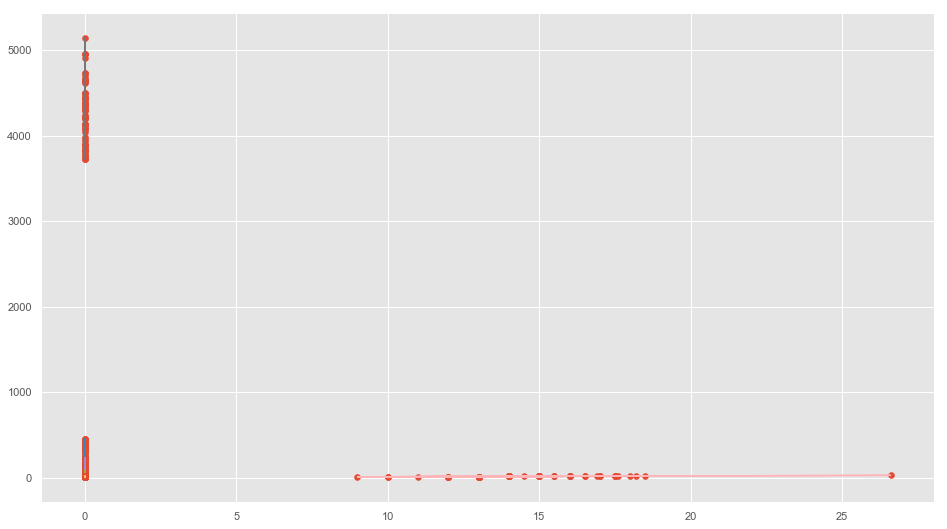

In [122]:

plt.plot(y3plot,X3_train,)
plt.scatter(y3plot,X3_train)